Nama : Arif Wijaksono

Nim : 2109106129

Link Dataset : https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

untuk menyambungkan google drive ke google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/MyDrive/KB/archive (6).zip'

IMPORT LIBRARY

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/KB/archive (6).zip'

SPLIT DATASET

DATASET DI SPLIT DENGAN RASIO 80,10,10

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio("Shoe vs Sandal vs Boot Dataset",
                   output="dataset_final",
                   seed = 1337,
                   ratio=(.8,.1,.1))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

MENGUBAH BENTUK GAMBAR DARI TRAIN DAN VAL

In [ ]:
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator  = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator  = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

MEMBUAT MODEL

In [ ]:
model = Sequential([

    Conv2D(16,(3,3), activation = 'relu', input_shape = (68,68,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

MEMBUAT FITUR CALLBACK DAN MELATIH MODEL

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [27]:
history = model.fit(train_generator, epochs = 2,
          validation_data = val_generator,
          verbose = 1, callbacks=[early_stopping])

Epoch 1/2
375/375 [==============================] - 77s 206ms/step - loss: -165450042310656.0000 - accuracy: 0.3803 - val_loss: -179238195953664.0000 - val_accuracy: 0.3845
Epoch 2/2
375/375 [==============================] - 66s 175ms/step - loss: -191690027565056.0000 - accuracy: 0.3841 - val_loss: -207157244985344.0000 - val_accuracy: 0.3825


EVALUATE HASIL MODEL

In [28]:
test_datagen  = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1502 images belonging to 3 classes.


In [29]:
model.evaluate(test_generator)

47/47 [==============================] - 2s 49ms/step - loss: -209022502305792.0000 - accuracy: 0.3842


[-209022502305792.0, 0.38415446877479553]

MEMBUAT PLOT HASIL TRAIN

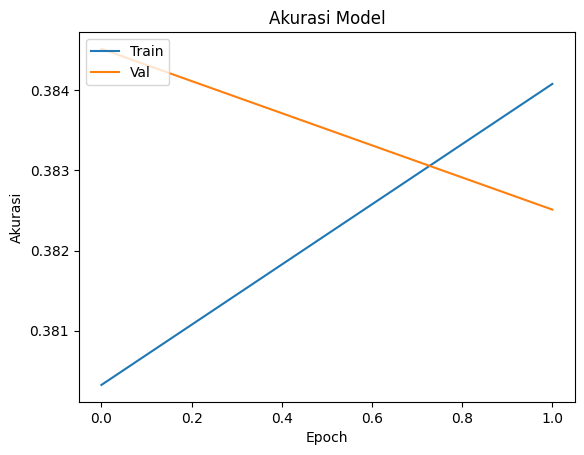

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

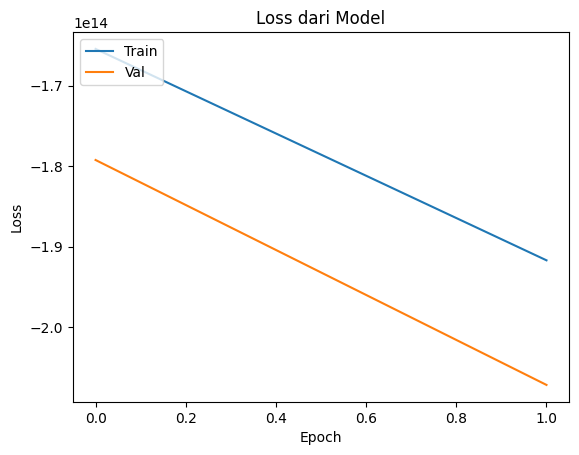

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss dari Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()